# CE888 Assignment 1

This code is written as part of requirments of CE888 Data Science and Decision Making for Task 1 of Project 1.

**Author**          : Tomoko Ayakawa<br> 
**Created on**      : 5 February 2019<br> 
**Last modified on**: 6 February 2019<br> 

In [11]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [23]:
file = "../data/phishing/Training Dataset.txt"
with open(file, 'r') as f:
    data = f.read()

# split data into lines
lines = data.split("\n")

11092

In [22]:
# split each lint into cells and obtain feature matrix
feature_names = []
data = []

for line in lines:
    if line != "":
        if line[0] == "@":
            cells = line.split(" ")
            if cells[0] == "@attribute":
                feature_names.append(cells[1])
        else:
            data.append(line.split(","))
            
# convert the data into DataFrame
data_df = pd.DataFrame(data)

# replace default column names with feature names
data_df.columns = feature_names

# replace string representations into numeric values
data_df = data_df.replace({"-1": -1, "0":0, "1":1})

data_df.shape

(11055, 31)

In [60]:
def histogram(data_df):
    num_cols = len(data_df.columns)

    # convert DataFrame to numpy array
    data = data_df.values

    # define figure grid
    if num_cols < 6: row, col = 1, num_cols
    else: row, col = num_cols//4+1, 4

    # create figure object
    fig = plt.figure(figsize = (col*5, row*3))
    
    # plot data
    for i in range(num_cols):
        plt.subplot (row, col, i+1)
        plt.title (data_df.columns[i])
        sns.distplot(data_df[data_df.columns[i]].values, kde=False, rug=False)

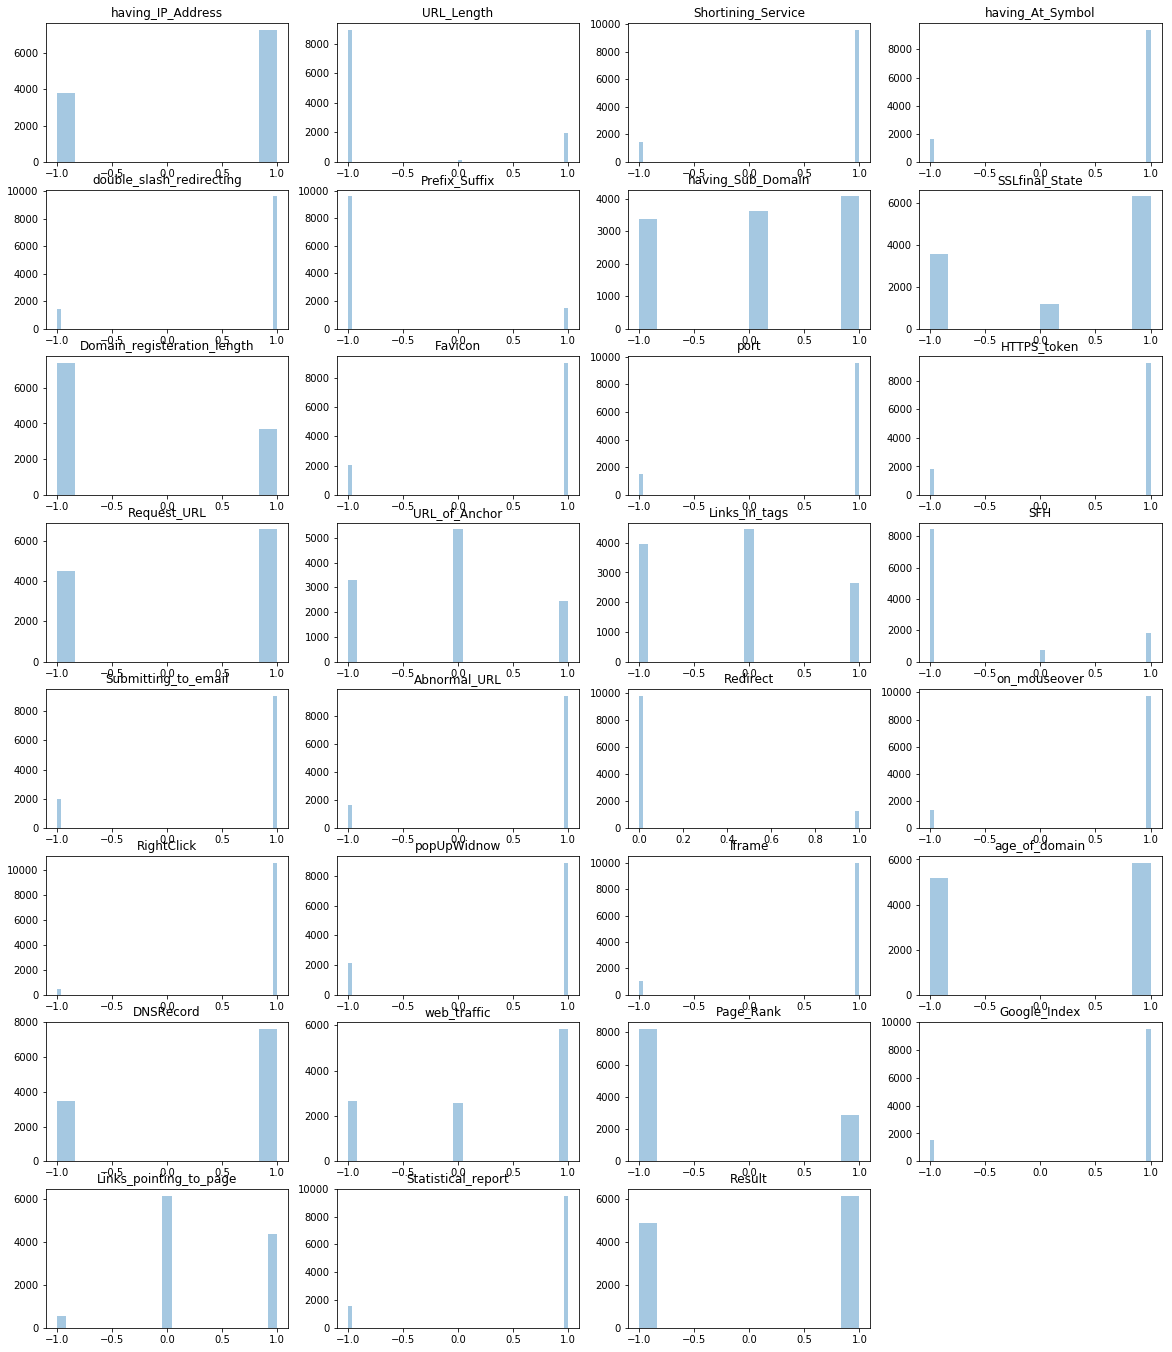

In [61]:
histogram(data_df)        

In [62]:
def cr_heatmap(data_np, labels):
    size = len(labels) * 0.5
    fig = plt.figure(figsize = (size, size))
    hm = sns.heatmap(data_np, cbar = True, annot = True, square = True, 
                     fmt = '.2f', annot_kws = {'size': 8},
                     yticklabels = labels,
                     xticklabels = labels)
    plt.show ()

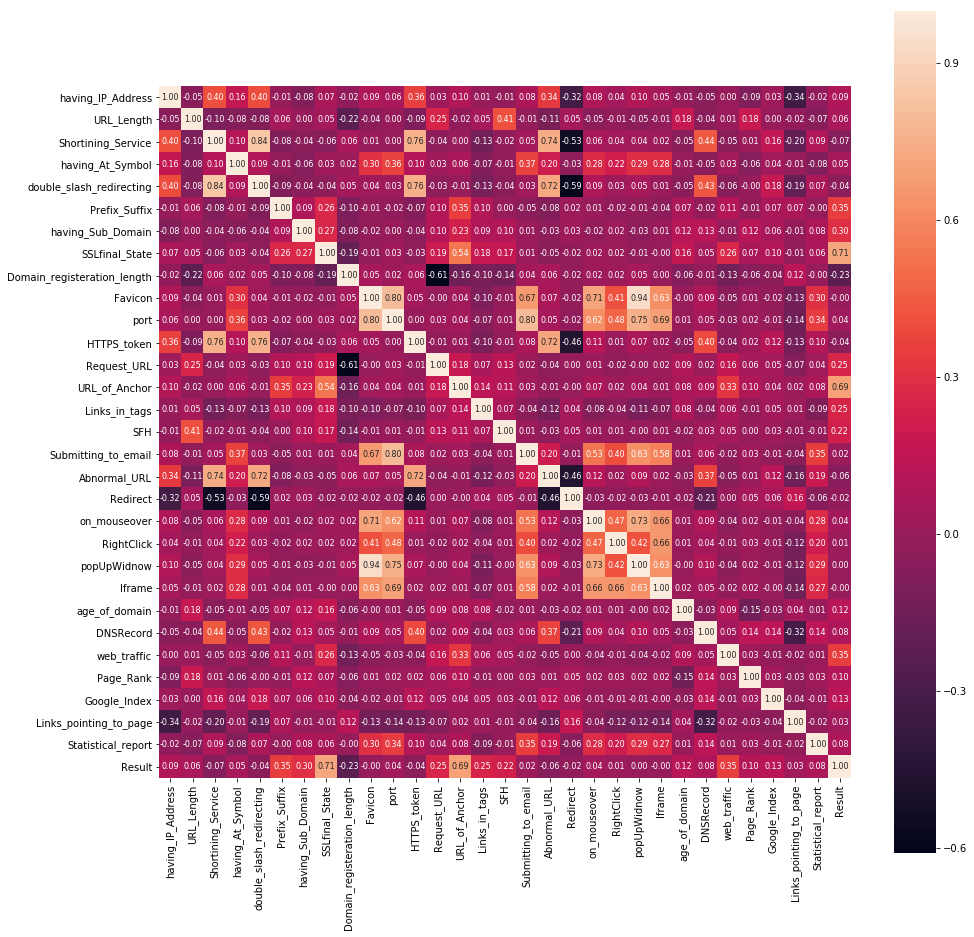

In [63]:
# heatmap of the correlation coefficient matrix
cr = np.corrcoef (data_df.values.T)
cr_heatmap(cr, feature_names)

In [64]:
def cr_bar_graph (data_np, feature_names):
    size_h = len (data_np)*0.5
    size_v = size_h * 0.5
    
    fig = plt.figure (figsize = (size_h, size_v))
    index = np.arange (len (data_np))
    plt.bar(index, data_np)
    plt.title ("Correlation Coefficient with the Label", fontsize = 10)
    plt.xlabel("Features", fontsize = 10)
    plt.xticks(index, feature_names, fontsize = 10, rotation = 90)
    plt.show ()

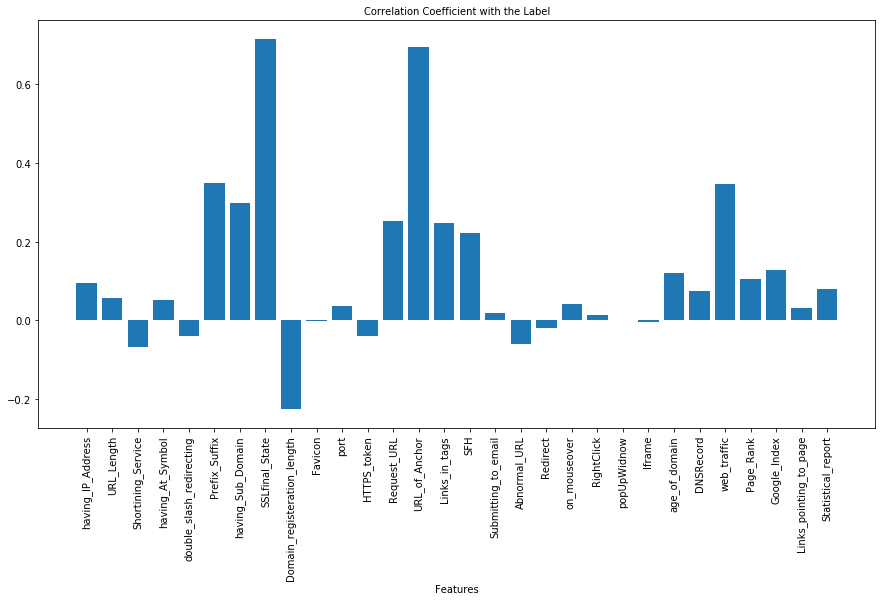

In [65]:
cr_with_labels = cr[-1][:-1]
cr_bar_graph (cr_with_labels, feature_names)